In [19]:
from pathlib import Path
import sys
import os
path_root = Path(os.getcwd()).parents[1]
sys.path.append(str(path_root))

In [20]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [21]:
with open('../../outputs/gpt/train_metrics.pickle', 'rb') as f:
    training_metrics = pickle.load(f)

EOFError: Ran out of input

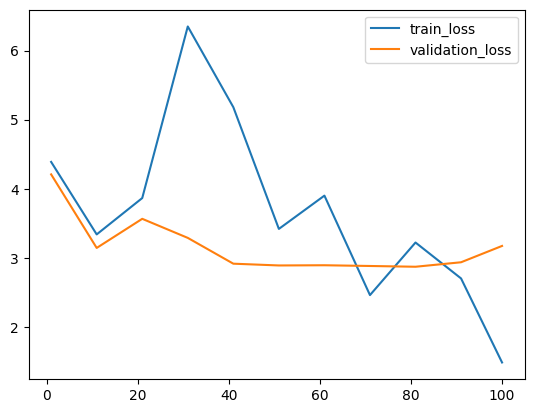

In [ ]:
plt.plot(*list(zip(*[(m['global_step'], m['train_loss']) for m in training_metrics])), label='train_loss')
plt.plot(*list(zip(*[(m['global_step'], m['validation_loss']) for m in training_metrics])), label='validation_loss')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--')
plt.legend()
plt.show()

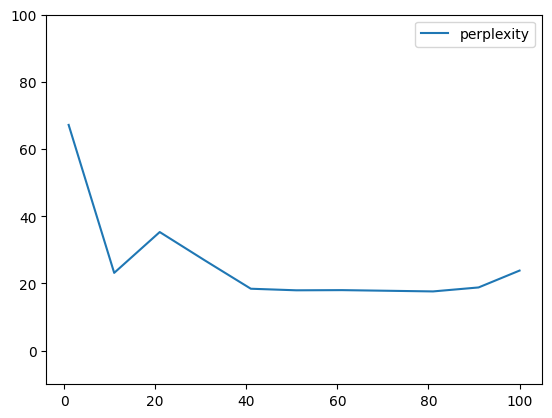

In [ ]:
plt.plot(*list(zip(*[(m['global_step'], m['perplexity']) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.ylim(top=100, bottom=-10)
plt.legend()
plt.show()

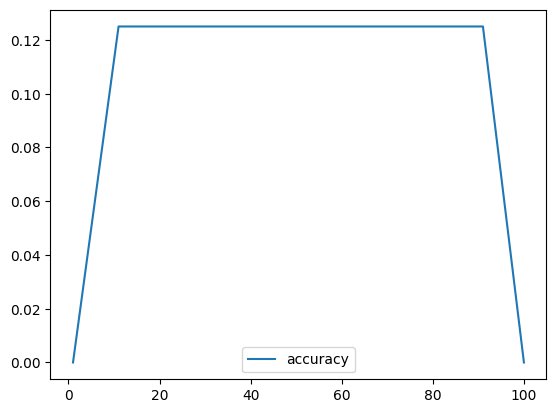

In [ ]:
plt.plot(*list(zip(*[(m['global_step'], m['accuracy'].item()) for m in training_metrics])), label='accuracy')# plt.plot(*list(zip(*[(m['global_step'], m['perplexity'].item()) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.legend()
plt.show()

In [ ]:
min([m['validation_loss'] for m in training_metrics])

2.869882345199585

# Final Evaluation Outputs

In [ ]:
food_names = np.load('../../../data/local/final/full/food_names/0.npy', allow_pickle=True)
food_names.shape

(1110,)

In [ ]:
input = training_metrics[-1]['input']
output = training_metrics[-1]['output']

In [ ]:
pd.set_option('max_colwidth', None)

In [ ]:
input[1].shape

torch.Size([1, 13])

In [ ]:
pd.DataFrame({
    'input': food_names[input[0]].tolist(), 
    'label': food_names[input[1]].tolist(),
    'prediction': food_names[output.argmax(2)].tolist(), 
})

,input,label,prediction
0,"[gelatin, water, yogurt, sugar, vanilla, cardamom, sweet orange, cinnamon, <end>, <pad>, <pad>, <pad>, <pad>]","[water, yogurt, sugar, vanilla, cardamom, sweet orange, cinnamon, <end>, <pad>, <pad>, <pad>, <pad>, <pad>]","[salt, salt, salt, salt, salt, salt, salt, salt, salt, salt, salt, salt, salt]"


This way of evaluating the model is wrong. There are repeated predicted tokens here because it is predicting from the input, and the most probable token hasn't yet appeared in the input.

We need to evaluate the model by simply looking at generations that it does.

In [ ]:
model = torch.load('../../outputs/gpt/model.pt').to('cuda')
model.eval();

In [ ]:
np.argwhere(food_names=='chicken')

array([[418]])

In [ ]:
context = (torch.ones((5,1), dtype=torch.long)*418).to('cuda')
context

tensor([[418],
        [418],
        [418],
        [418],
        [418]], device='cuda:0')

In [ ]:
generations = model.generate(context, 14).to('cpu')
food_names[generations]

array([['chicken', 'cream', 'butter', 'shrimp', 'bread', 'tinda',
        'cheese', 'curry powder', 'milk cow', 'smelt', '<end>',
        'freshwater eel', 'cook common beet', 'domestic pig', '<end>'],
       ['chicken', 'sugar', 'oil palm', 'salt', 'domestic pig',
        'onion-family vegetable', 'milk cow', 'onion-family vegetable',
        'oval-leaf huckleberry', 'oil palm', 'salt', 'salt',
        'curry powder', 'sauce', 'liquor'],
       ['chicken', 'salt', 'lime', 'nut', 'vanilla', 'egg', 'milk cow',
        'salt', 'meat bouillon', 'domestic pig', 'butter', 'pepper',
        'dried rosemary', 'green onion', 'mushroom'],
       ['chicken', 'bread', 'salt', '<end>', 'egg', 'nut', 'lemon',
        '<unknown>', 'sauce', 'salt', 'pepper', 'sugar', 'celery stalk',
        'oil palm', 'salt'],
       ['chicken', 'corn', 'onion-family vegetable', 'salad dressing',
        '<unknown>', 'vanilla', 'celery stalk', '<unknown>',
        'onion-family vegetable', 'egg', 'garlic', 'lettuce'